In [1]:
#Topic 2 Baseball Game Nash Equilibrium
import random
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy #to solve equation
from sympy import *

In [2]:
# Choices
strset_bat = [0,1] #0 for L and 1 for R
strset_pit = [0,1] #0 for L and 1 for R

# Payoff Matrix
# --------- Payoff matrix has 2 equilibria ------#
# Remark: There are 2 games: coordination or non-coordination game that may result in multiple pure NE.
# Uncomment if needed to examine the game in question.

# -- Battle of the Sexes game --#
paymat_bat = [[3,1],[0,2]]
paymat_pit = [[2,0],[1,3]]
# The strategic form #
# ----------------------------------#
#                    Pitcher        #
# ----------------------------------#
#         |       |   0    |   1    #
#         |       |  (1-p) |  (p)   #
#         |-------------------------#
#  Batter |   0   |  3,2   |  1,1   #
#         | (1-b) |        |        #
#         |-------------------------#
#         |   1   |  0,0   |  2,3   #
#         |  (b)  |        |        #
#-----------------------------------#

# 2 pure Nash eqm: (0,0) and (1,1)

''' 
# Uncomment this section and comment the previous to enable this game
# -- Chicken Game -- #
paymat_bat = [[0, -1], [1, -4]]
paymat_pit = [[0, -1], [1, -4]]
# The strategic form #
# ----------------------------------#
#                    Pitcher        #
# ----------------------------------#
#         |       |   0    |   1    #
#         |       |  (1-p) |  (p)   #
#         |-------------------------#
#  Batter |   0   |  0,0   |  -1,1  #
#         | (1-b) |        |        #
#         |-------------------------#
#         |   1   |  1,-1  |  -4,-4 #
#         |  (b)  |        |        #
#-----------------------------------#

# 2 pure Nash eqm: (0,1) and (1,0)

'''

' \n# Uncomment this section and comment the previous to enable this game\n# -- Chicken Game -- #\npaymat_bat = [[0, -1], [1, -4]]\npaymat_pit = [[0, -1], [1, -4]]\n# The strategic form #\n# ----------------------------------#\n#                    Pitcher        #\n# ----------------------------------#\n#         |       |   0    |   1    #\n#         |       |  (1-p) |  (p)   #\n#         |-------------------------#\n#  Batter |   0   |  0,0   |  -1,1  #\n#         | (1-b) |        |        #\n#         |-------------------------#\n#         |   1   |  1,-1  |  -4,-4 #\n#         |  (b)  |        |        #\n#-----------------------------------#\n\n# 2 pure Nash eqm: (0,1) and (1,0)\n\n'

In [3]:
#Define the Player Class
class Player():
    rev_prob = 0.01 #prob to receive revision opportunity
    def __init__(self,hand):
        self.hand = hand
    def best_resp(self,payVec):
        if random.uniform(0,1) < self.rev_prob: #Then the agent gets a revision opportunity
            if payVec[self.hand] != max(payVec): #if the payoff vector is not maximum
                self.hand = np.argmax(payVec) #change to the action [index] that has the maximum payoff vec
#Batter 
class Batter(Player):
    @classmethod
    def pay_vec(cls,prop1Pit): #cal his payoff based on pit's prob1
        return [(1-prop1Pit)*paymat_bat[bat_hand][0] + prop1Pit*paymat_bat[bat_hand][1] for bat_hand in strset_bat]
#Pitcher
class Pitcher(Player):
    @classmethod
    def pay_vec(cls,prop1Bat):
        return [(1-prop1Bat)*paymat_pit[pit_hand][0] + prop1Bat*paymat_pit[pit_hand][1] for pit_hand in strset_pit]

#Fn to calculate the prop of right-handed batters & pitchers (1,1)
def prop1(pop_players):
    hands_list = [player.hand for player in pop_players]
    return hands_list.count(1)/len(hands_list)

#Calculate mixed str Nash eqm
def fn_nashMSE(paymat_bat,paymat_pit):
    paymat_bat = np.array(paymat_bat)
    paymat_pit = np.array(paymat_pit)
    #convert payoff matrix to sy.Matrix format
    bat_payoff = sy.Matrix(paymat_bat)
    pit_payoff = sy.Matrix(paymat_pit)
    #b for prob1 bat, p for prob1 pit. Need to solve b and p
    b = sy.Symbol('b')
    p = sy.Symbol('p')
    #prob matrix for batters and pitchers
    bat_prob = sy.Matrix([1-b,b])
    pit_prob = sy.Matrix([1-p,p])
    #calculate expected payoff for batters and pitchers (based on the other's prob matrix)
    bat_exp = bat_payoff*pit_prob #-> 2x1 matrix A(p)
    pit_exp = pit_payoff*bat_prob  # -> 2x1 matrix B(b)
    #Solving for b. A[0] should = A[1]
    bat_nash = solve(bat_exp[0] - bat_exp[1],p)
    pit_nash = solve(pit_exp[0] - pit_exp[1],b)
    return pit_nash,bat_nash

#Print the pyaoff matrix
print(f'Batter payoff matrix: {paymat_bat} \nPicher payoff matrix {paymat_pit}')
#Find Nash mixed strategy Eqm
pit_nash, bat_nash = fn_nashMSE(paymat_bat, paymat_pit)
print(f'Nash equilibrium: [prop1Bat, prop1Pit] = {pit_nash,bat_nash}')

Batter payoff matrix: [[3, 1], [0, 2]] 
Picher payoff matrix [[2, 0], [1, 3]]
Nash equilibrium: [prop1Bat, prop1Pit] = ([1/4], [3/4])


In [4]:
import numpy as np
#create a dictionary to store prop_hist for multiple initial values
hist_rec = {}
for bat in np.arange(0.1,1,0.1):
  for pit in np.arange(0.1,1,0.1):
    #add record to dictionary
    hist_rec['init'+'('+str(bat)+','+str(pit)+')'] = []
    #hist_rec['init'+'('+str(bat)+','+str(pit)+')'].append({'init_bat': bat, 'init_pit': pit})
    #Generate initial population and parameters
    #batters population
    num_bat = 1000
    #init_prop1Bat = 0.08*birth_month
    init_prop1Bat = bat
    init_num1Bat = round(init_prop1Bat*num_bat)
    batters_list = [Batter(1) for i in range(init_num1Bat)]+[Batter(0) for i in range(num_bat - init_num1Bat)]
    init_prop1Bat = prop1(batters_list)

    #pitcher population
    num_pit = 1000
    #init_prop1Pit = 0.03*birth_day
    init_prop1Pit = pit
    init_num1Pit = round(init_prop1Pit*num_pit)
    pitchers_list = [Pitcher(1) for i in range(init_num1Pit)]+[Pitcher(0) for i in range(num_pit - init_num1Pit)]
    init_prop1Pit = prop1(pitchers_list)

    #parameters
    end_time = 1000 #no of iteration
    hist_prop1Bat = []
    hist_prop1Pit = []
    #Dynamics
    for time in range(end_time):
        #Update the payoff vector for each type of players
        current_prop1Bat = prop1(batters_list)
        current_prop1Pit = prop1(pitchers_list)
        #Update the history of proportion of RH batters & pitchers
        hist_prop1Bat.append(current_prop1Bat)
        hist_prop1Pit.append(current_prop1Pit)
        #Update new payoff vector
        current_payVecBat = Batter.pay_vec(current_prop1Pit)  # do not mistake for prop1Bat
        current_payVecPit = Pitcher.pay_vec(current_prop1Bat)
        #Revise str according to best response
        for batter in batters_list:
            batter.best_resp(current_payVecBat)
        for pitcher in pitchers_list:
            pitcher.best_resp(current_payVecPit)
    hist_rec['init'+'('+str(bat)+','+str(pit)+')'].append({'hist_bat':hist_prop1Bat,'hist_pit':hist_prop1Pit})

#print(hist_rec)

{'init(0.1,0.1)': [{'hist_bat': [0.1, 0.099, 0.097, 0.097, 0.097, 0.096, 0.094, 0.092, 0.09, 0.089, 0.089, 0.088, 0.088, 0.086, 0.084, 0.083, 0.082, 0.081, 0.081, 0.081, 0.081, 0.081, 0.081, 0.08, 0.077, 0.076, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.074, 0.074, 0.074, 0.072, 0.072, 0.071, 0.069, 0.069, 0.069, 0.069, 0.069, 0.068, 0.067, 0.067, 0.066, 0.064, 0.063, 0.062, 0.062, 0.062, 0.062, 0.062, 0.061, 0.061, 0.061, 0.059, 0.059, 0.059, 0.059, 0.059, 0.059, 0.057, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.054, 0.053, 0.053, 0.053, 0.053, 0.053, 0.053, 0.051, 0.051, 0.05, 0.05, 0.049, 0.049, 0.049, 0.049, 0.047, 0.047, 0.047, 0.047, 0.047, 0.044, 0.043, 0.043, 0.043, 0.043, 0.043, 0.043, 0.043, 0.041, 0.041, 0.041, 0.041, 0.04, 0.039, 0.039, 0.037, 0.037, 0.036, 0.036, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035, 0.034, 0.034, 0.032, 0.032, 0.031, 0.031, 0.03, 0.03, 0.03, 0.029, 0.029, 0.028, 0.028, 0.028, 0.028, 0.027, 0.027, 0.027, 0.027, 0.027, 0.02

" #uncomment to see the trajectory of the example.\nplt.plot(0.4,0.2,marker='o', color='blue')\nplt.annotate('initial point', xy=(0.4,0.1))\nplt.plot(hist_rec['init'+'('+'0.4'+','+'0.2'+')'][0].get('hist_bat'),\n         hist_rec['init'+'('+'0.4'+','+'0.2'+')'][0].get('hist_pit'), 'b-o')\n"

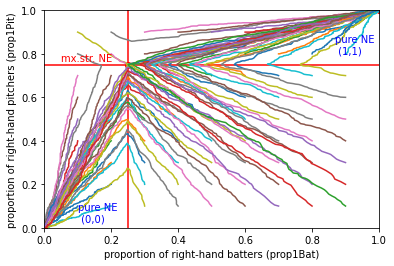

In [121]:
# -------- Plot --------- #
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axvline(x=pit_nash, color='red')
plt.axhline(y=bat_nash, color='red')
#mixed NE
plt.plot(float(pit_nash[0]), float(bat_nash[0]), 'ro')
plt.annotate('mx.str. NE', xy=(pit_nash[0]-0.2, bat_nash[0]+0.015), color='red')
#pure NE
plt.plot(0,0,marker='o', color='red')
plt.plot(1,1,'ro')
plt.annotate('pure NE \n (0,0)', xy=(0.1,0.03), color='blue')
plt.annotate('pure NE \n (1,1)', xy=(0.87, 0.8), color='blue')
for bat in np.arange(0.1, 1, 0.1):
  for pit in np.arange(0.1, 1, 0.1):
    #extract from: hist_rec['init'+'('+str(bat)+','+str(pit)+')']
    x = hist_rec['init'+'('+str(bat)+','+str(pit)+')'][0].get('hist_bat')
    y = hist_rec['init'+'('+str(bat)+','+str(pit)+')'][0].get('hist_pit')
    plt.plot(x, y)
    #plt.plot(bat, pit, 'ro') #uncomment to see the initial positions
plt.xlabel('proportion of right-hand batters (prop1Bat)')
plt.ylabel('proportion of right-hand pitchers (prop1Pit)')
''' #uncomment to see the trajectory of the example.
plt.plot(0.4,0.2,marker='o', color='blue')
plt.annotate('initial point', xy=(0.4,0.1))
plt.plot(hist_rec['init'+'('+'0.4'+','+'0.2'+')'][0].get('hist_bat'),
         hist_rec['init'+'('+'0.4'+','+'0.2'+')'][0].get('hist_pit'), 'b-o')
'''

In [ ]:
# ---- Reference -----
# https://saylordotorg.github.io/text_introduction-to-economic-analysis/s17-03-mixed-strategies.html
# https://stackoverflow.com/questions/23999801/python-creating-multiple-lists
# https://note.nkmk.me/en/python-dict-get/#:~:text=In%20Python%2C%20you%20can%20get,key%20with%20dict%5Bkey%5D%20.&text=In%20this%20case%2C%20KeyError%20occurs%20if%20the%20key%20does%20not%20exist.&text=Note%20that%20it%20is%20no,want%20to%20add%20new%20element.&text=Use%20in%20to%20check%20if%20a%20key%20exists%20in%20the%20dictionary.
# https://realpython.com/python-dicts/